Introduction
---
___

I decided to create a create a network to test the IMDB dataset, which is part of the keras datasets.

The IMDB dataset contains reviews from their website combined with a binary value, wihich determines if the review is positive or negative. The dataset is divided equally between positive and negative reviews.


Setting up the network
---
___

We begin by importing the necessary libraries that will allow us to use the IMDB dataset

In [ ]:
# Imports the tensorflow library and Keras API
import tensorflow as tf
from tensorflow import keras

# Imports the IMDB dataset and loads the data
from tensorflow.keras.datasets import imdb
# The model will only consider the 10000 most frequent words in the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Shows the size of each dataset
print("Training Dataset size:",len(train_data))
print("Testing Dataset size:",len(test_data))

17465344/17464789 [==============================] - 2s 0us/step
Training Dataset size: 25000
Testing Dataset size: 25000


Structure of the dataset
--
___
As we can see above, the training and testing datasets are each 25000 entries long.

The reviews are stored in a dictionary format which only recognises the 10000 most common words used and are attached to a binary value that determines the overall impression of the review: 1 for positive; 0 for negative.

Below is a example of the raw data imported into our model for value 512. The data is stored as an array of dictionary values

In [ ]:
print(train_data[512])

[1, 35, 441, 5, 2, 22, 701, 570, 47, 1309, 5826, 5719, 19, 521, 6575, 521, 4, 22, 946, 3209, 83, 6, 1313, 720, 315, 63, 4, 797, 850, 44, 4, 289, 293, 105, 143, 2183, 5, 2, 844, 4, 1313, 2465, 24, 17, 17, 6, 702, 1785, 1330, 21, 17, 6, 1311, 15, 166, 56, 4, 2159, 7, 4, 22, 315, 4, 521, 75, 67, 4, 105, 2306, 5, 2, 859, 44, 68, 4734, 456, 44, 4, 5626, 555, 2041, 1247, 83, 5, 853, 7087, 44, 138, 36, 645, 620, 11, 4, 86, 273, 76, 40, 997, 2426, 6, 7890, 18, 4, 105, 11, 548, 1333, 620, 1568, 14, 598, 105, 19, 6, 817, 8, 1491, 245, 39, 4, 2556, 1234, 15, 75, 32, 1741, 926, 8, 987, 18, 178, 68, 620, 2465, 17, 96, 8, 371, 1296, 113, 39, 35, 2, 1971, 5, 32, 289, 169, 49, 651, 7, 7890, 5, 1805, 11, 4, 1773, 10, 10, 61, 4747, 5, 3129, 64, 2, 1076, 11, 4, 277, 7, 4, 22, 121, 305, 7, 2799, 39, 68, 585, 4, 105, 306, 8, 2, 8, 116, 46, 148, 2556, 5626, 555, 13, 197, 36, 69, 3954, 39, 143, 68, 1311, 10, 10, 131, 4, 64, 283, 439, 19, 14, 22, 9, 15, 12, 286, 7897, 1005, 1898, 5525]


If we call the label linked to this piece of data, we can see the impression for this review is positive, since the label is 1

In [ ]:
print(train_labels[512])

1


If we use a function called decode_words and pass through the index of a piece of data in the training dataset, we can decode the numbers into a semi-readable format. The numbers represent actual words, whilst the question marks are words not common enough to be included.

In [ ]:
def decode_words(review):
  impression = train_labels[review]
  # Retrieves the dictionary of words
  word_index = imdb.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  # Creates the decoded review by looking up each number in the dictionary
  decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[review]])
  print("Decoded Review:",decoded_review)
  if impression == 0:
    print("Decoded Impression: Negative")
  else:
    print("Decoded Impression: Positive")
  

decode_words(512)


Encoded Review: [1, 35, 441, 5, 2, 22, 701, 570, 47, 1309, 5826, 5719, 19, 521, 6575, 521, 4, 22, 946, 3209, 83, 6, 1313, 720, 315, 63, 4, 797, 850, 44, 4, 289, 293, 105, 143, 2183, 5, 2, 844, 4, 1313, 2465, 24, 17, 17, 6, 702, 1785, 1330, 21, 17, 6, 1311, 15, 166, 56, 4, 2159, 7, 4, 22, 315, 4, 521, 75, 67, 4, 105, 2306, 5, 2, 859, 44, 68, 4734, 456, 44, 4, 5626, 555, 2041, 1247, 83, 5, 853, 7087, 44, 138, 36, 645, 620, 11, 4, 86, 273, 76, 40, 997, 2426, 6, 7890, 18, 4, 105, 11, 548, 1333, 620, 1568, 14, 598, 105, 19, 6, 817, 8, 1491, 245, 39, 4, 2556, 1234, 15, 75, 32, 1741, 926, 8, 987, 18, 178, 68, 620, 2465, 17, 96, 8, 371, 1296, 113, 39, 35, 2, 1971, 5, 32, 289, 169, 49, 651, 7, 7890, 5, 1805, 11, 4, 1773, 10, 10, 61, 4747, 5, 3129, 64, 2, 1076, 11, 4, 277, 7, 4, 22, 121, 305, 7, 2799, 39, 68, 585, 4, 105, 306, 8, 2, 8, 116, 46, 148, 2556, 5626, 555, 13, 197, 36, 69, 3954, 39, 143, 68, 1311, 10, 10, 131, 4, 64, 283, 439, 19, 14, 22, 9, 15, 12, 286, 7897, 1005, 1898, 5525]
Encoded

Preparing the data
--
___

Before we can create the model and insert this data into it, we need to format the data into a form our network can understand.

This function encodes each dataset with one-hot encoding, where each index in a sample is converted into a floating point tensor. In each data sample, an index is either 1 or 0, depending on if the dictionary value representing that index is present in the sample.

For example, if 'also' is value 2345 in the dictionary and present in the sample, index 2345 in the encoded sample will be 1.

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Building the network
--
___

To run the model, we need to add layers and adjust the variables to ensure the training and validation accuracy is as high as possible. After this, we will be able to run the optimal training network on the test set to evaluate our findings.


Choosing Values
___
By observing our problem, we can see what types of values we should use to build our network.

Our network is conducting binary classification, so we know that our last layer should have sigmoid activation and that it should have 1 hidden unit. This is because the final output value should only be 0 or 1. Additionally, the sigmoid activation will squash any output to [0,1], ensuring output is within the range of expected values.

Our network will use relu activation for the other layers as this will ensure that the values outputted from each layer are positive so that they can be reduced to between 0 and 1.

We will experiment between binary_crossentropy and mse for the loss function, as I am unsure about which function would be better to use.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses,optimizers

We begin by importing the necesssary libraries to build and train our network.

These libraries allow us to create models, layers and to run optimiser and loss functions.

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We also will need to prepare our data for validation.

Our datasets are large enough that we can use hold-out validation, which means that we divide our training dataset and validate our network with a set of data it hasn't seen yet. This helps us to spot overfitting easily, as we will see it during the validation part of each epoch.

We could also use k-fold cross validation, which divides the dataset into k groups and picks one of them for validation, however, this is mainly used for datasets of limited size.

Our model will use the first 10000 samples of the dataset for validation, which is around 40% of the original dataset size.

Plotting the results
___

To investigate the performance of the network, it is useful to plot the results so that we won't have to look through multiple variables coming from the console output.

In [ ]:
import matplotlib.pyplot as plt
    
def plot_loss(history):

    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('overfitting.eps', format = 'eps')
    plt.show()

def plot_acc(history):
    
    plt.clf()
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

These functions will allow us to instantly see the performance of the network over time. They will show a graph of both loss and accuracy plotted over epochs for both the training and validation datasets.

In [ ]:
# Importing libraries that allow us build networks
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses,optimizers

# Function that runs a built network
def run_model(model,l_rate,loss_function,epochs):
  # Compiles the network with the optimiser functions
  model.compile(optimizers.RMSprop(lr = l_rate),
             loss=loss_function,
             metrics=['accuracy'])
  
  # Splits the training dataset into the training set and validation set
  x_val = x_train[:10000]
  partial_x_train = x_train[10000:]
  y_val = y_train[:10000]
  partial_y_train = y_train[10000:]

  # Runs the network using the optimiser settings on the dataset
  history = model.fit(partial_x_train, 
                      partial_y_train,
                      epochs = epochs,
                      batch_size = 512,
                      verbose = 0,
                      validation_data = (x_val, y_val))
  
  # Plots the perfomance of the network
  plot_acc(history)
  plot_loss(history)


To allow us to build multiple models, I decided to create a function to run the model, which will allow to input multiple models and plot them by calling the function, with the variables we want to change.

The function compiles the network, then splits the dataset and runs the network and graphs the performance.

Training the network
--
___

1 layer
___

We begin by building a simple network with 1 sigmoid layer to see how well a simple network perfoms.

We initialise the network and add each layer sequentially, with the activation function (sigmoid for final layer; relu for all others). We also add the input shape so the network knows the size of the input

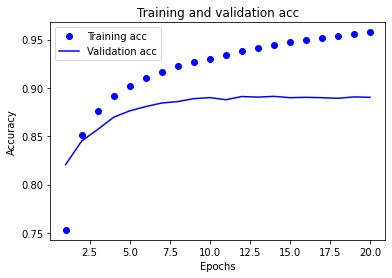

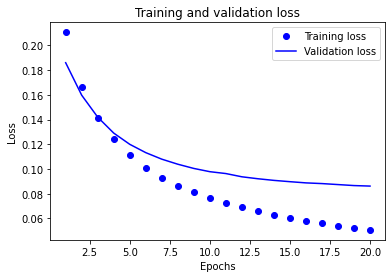

In [ ]:
model1 = models.Sequential()
# The input_shape is set to 10000 because the size of the dictionary is 10000 words
model1.add(layers.Dense(1, activation = 'sigmoid', input_shape=(10000)))
# We will use the default values for loss function, learning rate and epoch length
run_model(model1,0.001,'mse',20)

The training accuracy continues to increase while the validation accuracy plateaus after 8 epochs; the validation loss continues to decrease, but at a lower rate than the training loss.

This is overfitting, as the network is only effective on the data it was tested on. Other data, such as the validation data, doesn't work as well.

2 layers (n-1 network)
___

To improve the network, we can add a relu layer before the sigmoid layer, however, we will need to see how many hidden units are needed in the first layer. We will begin with 8, forming a 8-1 network.

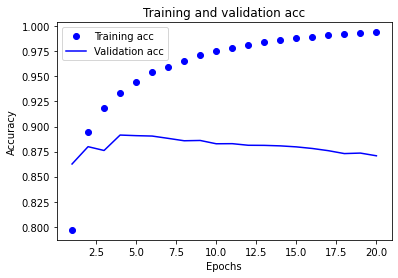

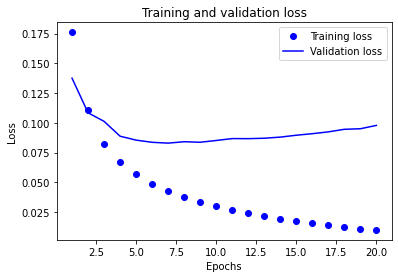

In [ ]:
model2 = models.Sequential()
# We shifted the input_shape declaration to the relu layer because this layer is now the first layer
model2.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model2.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model2,0.001,'mse',20)

Adding the first layer with 8 units only exacerbated the overfitting, leading to a decrease in the accuracy and an increase in the loss over time. We can increase the number of units in the first layer to make a 16-1 network, and see what happens.

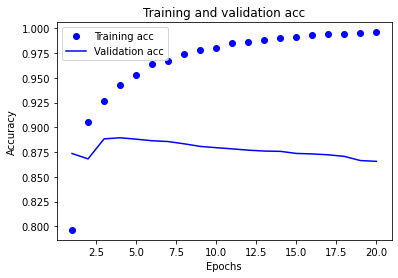

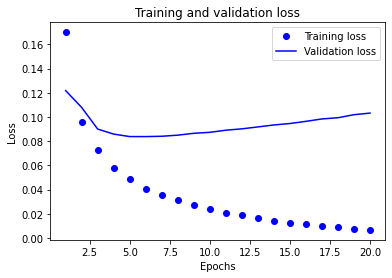

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model2.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model2,0.001,'mse',20)

Increasing the number of units to 16 had no effect on the performance of the network, as the graph shape was virtually the shame. To see if the performance can be improve in a n-1 network, we can increase the number of units to 32.

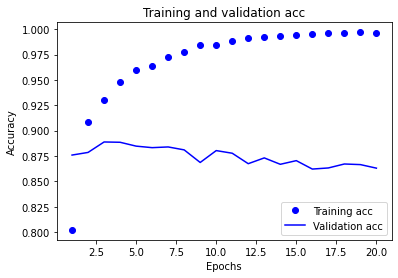

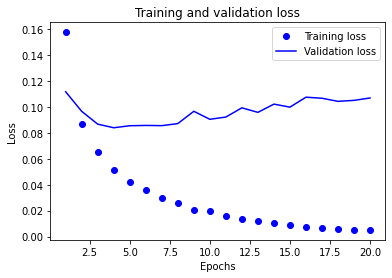

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model3.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model3,0.001,'mse',20)

Increasing the number of units to 32 slightly decreases the performance of the network, amking it clear that an n-1 network doesn't produce the most efficent solution for this situation.

Changing the loss function
___

The main concern so far is that a simple 1 layer network resulted in overfitting and adding another layer made it worse. This makes it clear that an n-1 network is not optimal; it may also mean that there is no optimal network. We can change the loss function to see if this improves performance, before moving to a 3 layer (n-n-1) network.

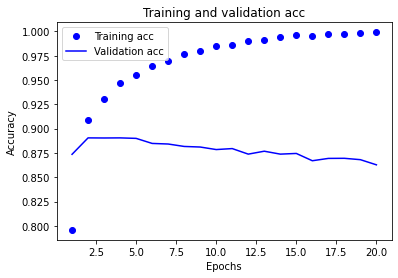

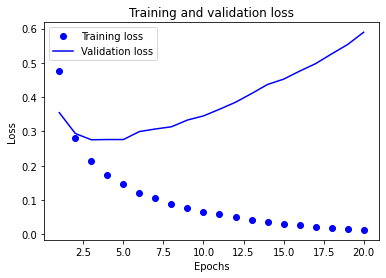

In [ ]:
model4 = models.Sequential()
model4.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model4.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model4,0.001,'binary_crossentropy',20)

Changing the loss function from 'mse' to 'binary-crossentropy' did not change the accuracy at all, however, it multiplied the validation loss by 6 times from 0.1 to 0.6, meaning that the better loss function to use is 'mse'.

3 layers (n-n-1 network)
___

I decided to start the 3 layer network construction with a 32-16-1 network, to see what happens when the number of units in each layer decrease.

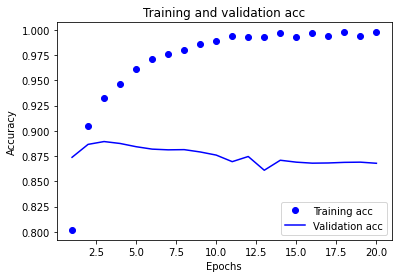

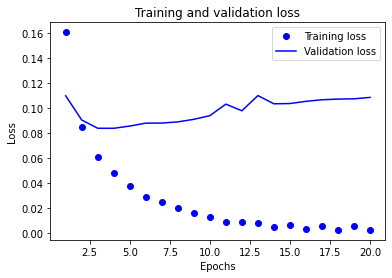

In [ ]:
model5 = models.Sequential()
model5.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model5.add(layers.Dense(16, activation = 'relu'))
model5.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model5,0.001,'mse',20)

This network did not affect the performance of the network, however the performance became more unpredictable after 10 epochs. To see if the first layer should have more units than the second network, we can create an 16-32-1 network and evaluate the performance.

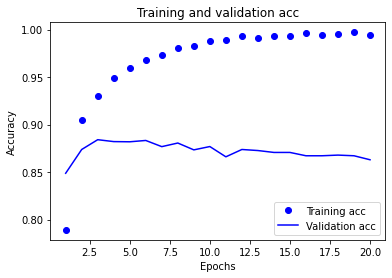

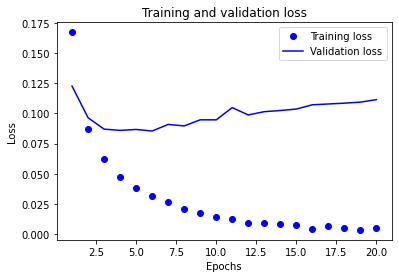

In [ ]:
model6 = models.Sequential()
model6.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model6.add(layers.Dense(32, activation = 'relu'))
model6.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model6,0.001,'mse',20)

Making the second layer larger than the first layer made the performance of the network on the validation data more unreliable. The validation accuracy increased then trended downwards; the validation loss decreased then trended upwards, however, they were both erratic. To remedy this, I decided to go back to having the layers decrease in the number of units, but doubling the first layer to create a 64-16-1 network.

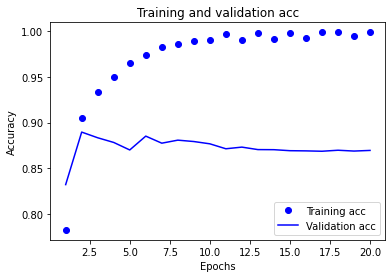

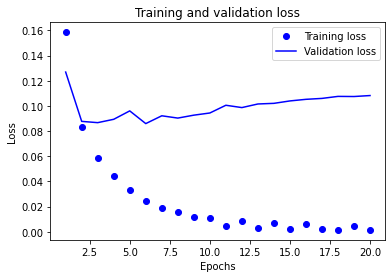

In [ ]:
model7 = models.Sequential()
model7.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model7.add(layers.Dense(16, activation = 'relu'))
model7.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model7,0.001,'mse',20)

The graph plotting the loss is virtually identical to the graph for Model 6, however, the validation accuracy is flat. After researching this online, it was suggested that I change the learning rate.

Changing learning rate
___

To keep this a fair test, I will keep the 64-16-1 model whilst adjusting the learning rate, which has been kept at 0.001 in the previous networks. To begin, will change the learning rate to 0.01.

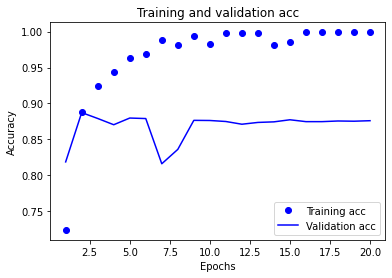

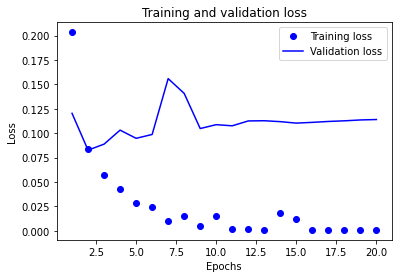

In [ ]:
model8 = models.Sequential()
model8.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model8.add(layers.Dense(16, activation = 'relu'))
model8.add(layers.Dense(1, activation = 'sigmoid'))
# The learning rate has been changed in the function call
run_model(model8,0.01,'mse',20)

Changing the learning rate to 0.01 resulted in a sudden poor perfomance in the 7th epochs, before improving to a similar level to Model 7.

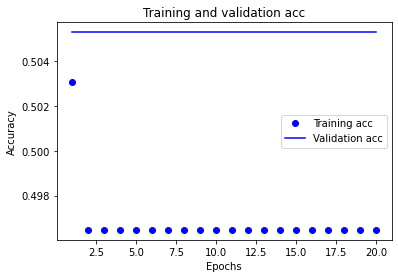

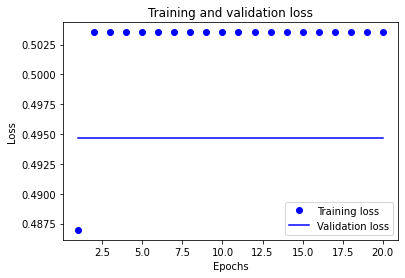

In [ ]:
model9 = models.Sequential()
model9.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model9.add(layers.Dense(16, activation = 'relu'))
model9.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model9,0.1,'mse',20)

Reducing the learning rate to 0.1 resulted in dead relu, where the neurons weren't effective after the second epoch. This means that we need to look at learning rates smaller than 0.001

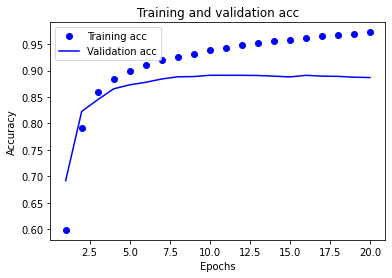

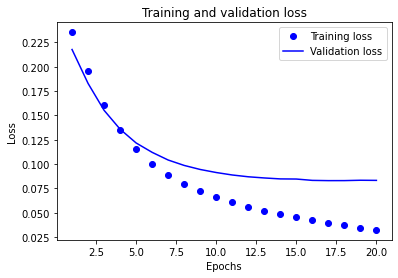

In [ ]:
model10 = models.Sequential()
model10.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model10.add(layers.Dense(16, activation = 'relu'))
model10.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model10,0.0001,'mse',20)

By decreasing the learning rate, the graph looks nearly identical to Model 1, however, the accuracy is slighly higher and the loss is slightly lower. To see if this trend continues, we can add another layer and see if the model fits the data better.

4 layers (n-n-n-1 network)
___

To begin, we will add a 16 unit layer

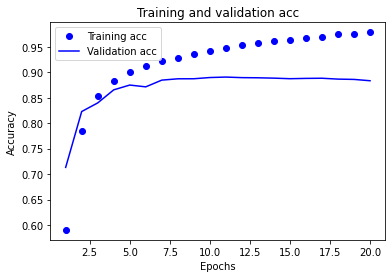

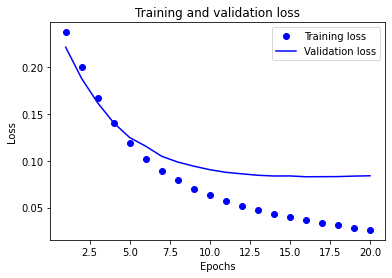

In [ ]:
model11 = models.Sequential()
model11.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model11.add(layers.Dense(16, activation = 'relu'))
model11.add(layers.Dense(16, activation = 'relu'))
model11.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model11,0.0001,'mse',20)

The graph has stayed the same, so I want to experiment with a 64-32-16-1 network, doubling the number of units in the second layer.

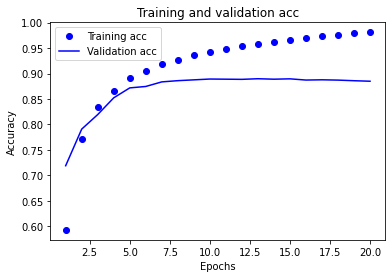

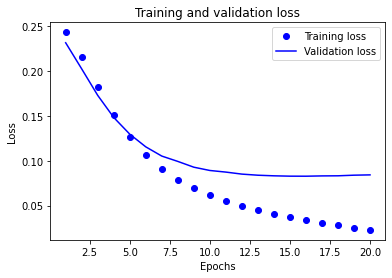

In [ ]:
model12 = models.Sequential()
model12.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model12.add(layers.Dense(32, activation = 'relu'))
model12.add(layers.Dense(16, activation = 'relu'))
model12.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model12,0.0001,'mse',20)

Doubling the number of units in the second layer did not change the performance of the network. To see if this improved, I added a 32 unit third layer.

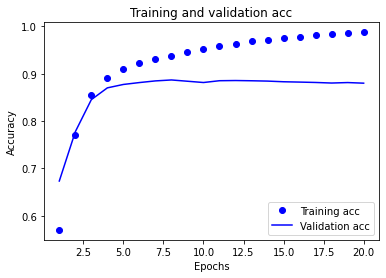

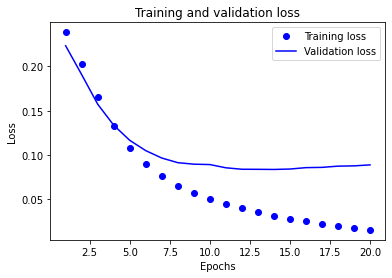

In [ ]:
model13 = models.Sequential()
model13.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model13.add(layers.Dense(32, activation = 'relu'))
model13.add(layers.Dense(32, activation = 'relu'))
model13.add(layers.Dense(16, activation = 'relu'))
model13.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model13,0.0001,'mse',20)

Changing the learning rate again
___
This network didn't improve anything compared to the previous network so I decided to reduce the learning rate again. This is because the level of overfitting decreased when the learning rate went from 0.001 to 0.0001. In this model, I decreased the learning rate to 0.00001.

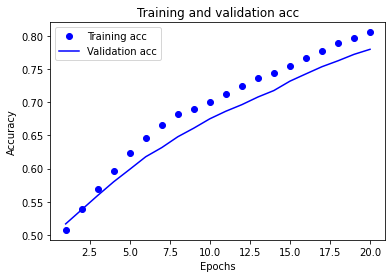

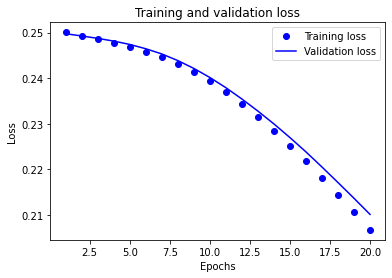

In [ ]:
model14 = models.Sequential()
model14.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model14.add(layers.Dense(32, activation = 'relu'))
model14.add(layers.Dense(32, activation = 'relu'))
model14.add(layers.Dense(16, activation = 'relu'))
model14.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model14,0.00001,'mse',20)

Changing the learning rate greatly reduced the amount of overfitting however the overall loss doubled and the accuracy decreased. This network works better with unseen data compared to the training set, but is less accurate overall compared to Model 13.

Increasing the number of epochs
___

To see if the accuracy increases over more epochs, I decided to test Model 14 over 40 epochs to see if the gradient continues.

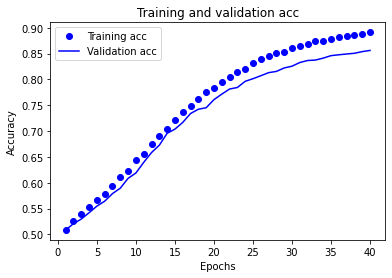

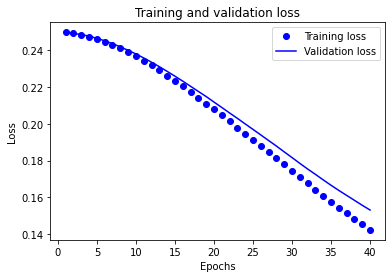

In [ ]:
model15 = models.Sequential()
model15.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model15.add(layers.Dense(32, activation = 'relu'))
model15.add(layers.Dense(32, activation = 'relu'))
model15.add(layers.Dense(16, activation = 'relu'))
model15.add(layers.Dense(1, activation = 'sigmoid'))
run_model(model15,0.00001,'mse',40)

Using 40 epochs improved the network performance to that of Models 10-13, whilst greatly reducing the amount of overfitting.

Testing the network
---
___

To see if the models are accurate, I decided to test models 13 and 15 with the test dataset. If we have good models, the performance of these models should match what we saw above. We will use the test_model function which is a modified version of the run_model function.

This function will train on the full training set, whilst testing on the full testing set.

In [ ]:
# Function that runs a built network
def test_model(model,l_rate,loss_function,epochs):
  # Compiles the network with the optimiser functions
  model.compile(optimizers.RMSprop(lr = l_rate),
             loss=loss_function,
             metrics=['accuracy'])

  # Runs the network using the optimiser settings on the dataset
  # Training and testing occurs on the whole dataset
  history = model.fit(x_train, 
                      y_train,
                      epochs = epochs,
                      batch_size = 512,
                      verbose = 0,
                      validation_data = (x_test, y_test))
  
  # Plots the perfomance of the network
  plot_acc(history)
  plot_loss(history)

Model 13
___

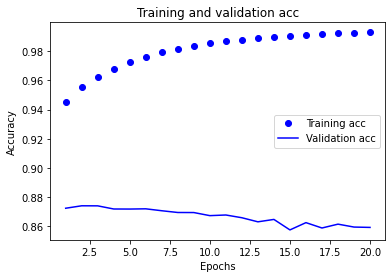

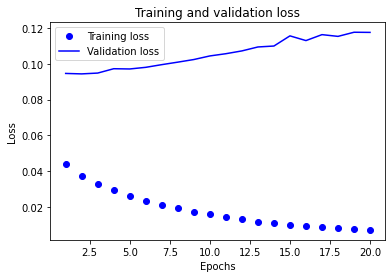

In [ ]:
test_model(model13,0.0001,'mse',20)

The overfitting in Model 13 was amplified compared to our previous tests, as the training accuracy was close to 1, but the testing accuracy was the same as before. The validation performance worsened in each epoch apart from epoch 15, meaning that this model cannot be the optimal solution to this n

Model 15
___

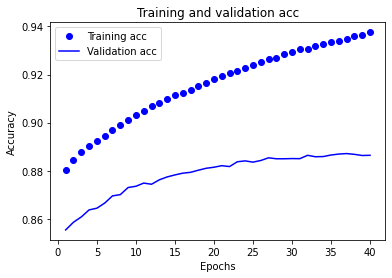

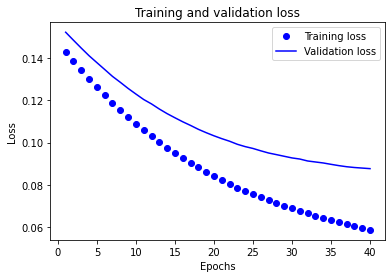

In [ ]:
test_model(model15,0.00001,'mse',40)

The overfitting while testing Model 15 was also amplified compared to the training, however, the overfitting was not as bad as in Model 13. The validation accuracy plateaued at 0.88 and the validation loss plateaued at 0.09. This model is the optimal solution out of all networks tested, even though it may not be the optimal network. This may include testing even larger networks than a  5 layer, 64-32-32-16-1 network, possibly including more than 10 layers, with adjustments alo made to the momentum.